# Solución de problemas en una base de datos

En este ejercicio adaptaremos una base de datos para poder trabajar con ellos. Trabajaremos con una base de datos extraida del UCI "Machine Learning Repository" http://www3.dsi.uminho.pt/pcortez/student.pdf

La base de datos cuenta con la siguiente información:
* “Escuela”. Indica si el estudiante en cuestión asistía a la escuela Gabriel Pereira (GP) o
* la escuela Mousinho da Silveira (MS).
* “Sexo”. F para mujeres y H para hombres.
* “Edad”. Edad del estudiante, en años.
* “HorasDeEstudio”. Cantidad de horas de estudio: 1 indica menos de dos horas, 2
indica de dos a cinco horas, 3 indica de cinco a diez horas, 4 indica más de diez horas.
* “Reprobadas”. Indica la cantidad de materias reprobadas previamente.
* “Internet”. Si el estudiante tenía acceso (yes) o no (no) a internet en su casa.
* “Faltas”. Cantidad de veces que faltó a clases.
* “G1”. Calificación del primer periodo, escala del 0 al 20.
* “G2”. Calificación del segundo periodo, escala del 0 al 20.
* “G3”. Calificación final, escala del 0 al 20.  
  
Buscaremos outlayers, crearemos variables dummies es decir transformaremos las variables categoricas para poder trabajar con ellas en una regresión lineal multiple, buscaremos correlaciones y genéraremos interacciones.

In [70]:
import numpy as np
import pandas as pd

df = pd.read_csv("data_1_5.csv")
print("Tipos de datos del data frame:\n", df.dtypes)
df.head()

Tipos de datos del data frame:
 Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10


Transformaremos las variables categoricas para que puedan utilizarse en un modelo de regresión lineal multiple.
Son todas las que el tipo de dato es un objeto y las horas de estudio ya que aunque es un numero son categoricos.

In [71]:
#Confirmamos que la variable categorica no tenga irregularidades en el tipo de dato.
print("Verificamos la variable categorica\n",df.HorasDeEstudio.value_counts()) 

#Buscamos las etiquetas donde el tipo de dato es un objeto.
ind = np.where(df.dtypes==object)

#Generamos variables dummie, las concatenamos y borramos las originales para los tipos de datos object
for i in ind:

    #Creamos el dummie
    dummy = pd.get_dummies(df.iloc[:,i],drop_first=True)
    
    #Concatenamos
    df = pd.concat([df,dummy],axis = 1)

# Eliminar variables originales
df = df.drop(labels=df.columns[ind], axis = 1)

#Como el tipo de dato de horas de estudio no es un objeto tenemos que hacerlo "A mano"
#Creamos el dummie
dummyHorasEstudio = pd.get_dummies(df.HorasDeEstudio,drop_first=True)

#Concatenamos
df = pd.concat([df,dummyHorasEstudio],axis=1)

#Eliminamos la label original
df = df.drop("HorasDeEstudio", axis = 1)


#Obseramos los tipos de datos
print("\nTipos de datos originales:\n", df.dtypes)

#Convertimos los bool a numericos
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)

#Comprobamos
print("\nConvertido a valores numericos:\n", df.dtypes)

# Imprimir primeras 5 observaciones
display(df.head())


Verificamos la variable categorica
 HorasDeEstudio
2    198
1    105
3     65
4     27
Name: count, dtype: int64

Tipos de datos originales:
 Edad            int64
Reprobadas      int64
Faltas          int64
G1              int64
G2              int64
G3              int64
Escuela_MS       bool
Sexo_M           bool
Internet_yes     bool
2                bool
3                bool
4                bool
dtype: object

Convertido a valores numericos:
 Edad            int64
Reprobadas      int64
Faltas          int64
G1              int64
G2              int64
G3              int64
Escuela_MS      int32
Sexo_M          int32
Internet_yes    int32
2               int32
3               int32
4               int32
dtype: object


,Edad,Reprobadas,Faltas,G1,G2,G3,Escuela_MS,Sexo_M,Internet_yes,2,3,4
0,18,0,6,5,6,6,0,0,0,1,0,0
1,17,0,4,5,5,6,0,0,1,1,0,0
2,15,3,10,7,8,10,0,0,1,1,0,0
3,15,0,2,15,14,15,0,0,1,0,1,0
4,16,0,4,6,10,10,0,0,0,1,0,0


Observamos que ahora las variables son adecuadas.   
Ahora usando el método de tukey buscaremos las observaciones atipicas para las faltas.

In [72]:
# Cuartil uno
q1 = df.Faltas.quantile(0.25)
# Cuartil tres
q3 = df.Faltas.quantile(0.75)
# Rango intercuartil
iqr = q3-q1
# Límite inferior
li = q1-(3*iqr)
# Límite superior
ls = q3+(3*iqr)
# Observaciones fuera de cualquiera de los dos límites
out = np.where((df.Faltas<=li)|(df.Faltas>=ls))[0]
# Imprimir información de outliers
display(df.iloc[out,:])

,Edad,Reprobadas,Faltas,G1,G2,G3,Escuela_MS,Sexo_M,Internet_yes,2,3,4
74,16,0,54,11,12,11,0,0,1,1,0,0
183,17,0,56,9,9,8,0,0,1,1,0,0
276,18,0,75,10,9,9,0,0,1,1,0,0
307,19,1,38,8,9,8,0,1,1,0,0,0
315,19,1,40,13,11,11,0,0,1,0,1,0


Sin lugar a dudas son demasiadas faltas y parecen no tener sentido, en este caso decidí dejarlas por la posibilidad de que sean reales ya que con tantas faltas probablemente no tendrían calificaciones al menos del ultimo parcial en caso de que no este permitido en su universidad, aunque en caso de que esten errados esto pondría en duda la veracidad de todos los datos, no unicamente los outlayers, sugiriendo ponernos en contacto con los autores y varificar que dichos datos esten correctos, poner en duda a los outlayers nos podría costar toda la columna de reprobadas que considero será útil, son muchas faltas, pero dentro de algo plausible.  
    
Generaremos una matriz de correlaciones 

5 4 0.9048679892693012
5 3 0.8014679320174147
3 4 0.8521180663648064


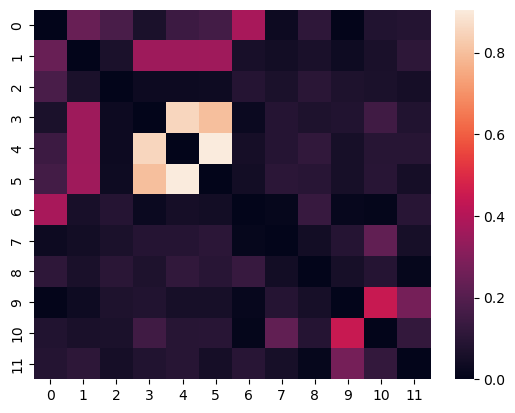

In [73]:
# Obtener valor absoluto de matriz de correlación
cor=abs(np.corrcoef(df,rowvar=False))
# Llenar la diagnoal con ceros ya que habrá una correlación de 1, entorpeciendo el análisis 
np.fill_diagonal(cor,0)
# Obtener los índices (i,j) de la posición del valor máximo
i,j = np.unravel_index(cor.argmax(),cor.shape)
# Observamos los datos maximos
print(i,j,cor[i,j])
# Importar función heatmap de la librería seaborn
from seaborn import heatmap
# Graficar heatmap
heatmap(cor)

#Añadido despues de ver el heatmap para verificar lo visto visualmente.
print(5,3,cor[5,3])
print(3,4,cor[3,4])

Podemos obsevar que existe una alta relación entre las variables:  
5 (G3) y 4 (G2) con un valor de: 0.90  
5 (G3) y 3 (G1) con un valor de: 0.80  
3 (G1) y 4 (G2) con un valor de: 0.85  

Es decir que las calificaciones por parcial de cada uno de los alumnos son muy parecidas, casi como si tuvieras la misma variable, como aportan la misma información, eliminare G1 ya que si analizamos un poco nos damos cuenta que se relaciona por mucho con G2, es decir contienen información parecida que puede entorpecer nuestro modelo al asignarle pesos similares y no poder aislar el peso de cada una de las variables en una regresión lineal multiple, donde además tener menos variables es un beneficio de computo y en contra de la sobre ajuste. No eliminamos G3 porque es la variable que buscamos predecir. G2 se relaciona más con G3 G1 por eso mantenemos G2.

In [74]:
#Eliminamos las variables mencionadas
df = df.drop(["G1"], axis = 1)

#Verificamos nuestros datos
display(df.head(5))

,Edad,Reprobadas,Faltas,G2,G3,Escuela_MS,Sexo_M,Internet_yes,2,3,4
0,18,0,6,6,6,0,0,0,1,0,0
1,17,0,4,5,6,0,0,1,1,0,0
2,15,3,10,8,10,0,0,1,1,0,0
3,15,0,2,14,15,0,0,1,0,1,0
4,16,0,4,10,10,0,0,0,1,0,0


Incluiremos terminos de interacción para dos pares de variables, pero antes vamos a separar nuestros datos en "X" e "Y" para poder realizar las interacciones. Separaremos los datos en 80% de entrenamiento y 20% de prueba.


In [75]:
# Importar función
from sklearn.model_selection import train_test_split
# Generar subconjuntos de prueba y entrenamiento para X e Y
x_train, x_test, y_train, y_test = train_test_split(df.drop("G3",axis=1),df.G3,train_size=0.8)
# Imprimir tamaño de nuevos objetos para verificar que se hayan dividido bien
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(316, 10)
(316,)
(79, 10)
(79,)


Generaremos dos interacciones:

1: La cantidad de faltas por materias reprobradas   
2: La calificación del segundo parcial con las horas de estudio en categoría 2, de dos a 5 horas de estudio.


In [76]:
# Insertamos las interracciones en el lugar correspondiente
x_train.insert(3,"Reprobadas Faltas", x_train.Reprobadas*x_train.Faltas)
x_test.insert(3,"Reprobadas Faltas", x_test.Reprobadas*x_test.Faltas)
x_train.insert(8,"G2 Internet_yes", x_train.G2*x_train.Internet_yes)
x_test.insert(8,"G2 Internet_yes", x_test.G2*x_test.Internet_yes)

display(x_train.head())
display(x_test.head())

,Edad,Reprobadas,Faltas,Reprobadas Faltas,G2,Escuela_MS,Sexo_M,Internet_yes,G2 Internet_yes,2,3,4
389,18,1,0,0,5,1,0,0,0,1,0,0
147,15,0,2,0,11,0,0,1,11,1,0,0
195,17,0,0,0,15,0,0,1,15,1,0,0
128,18,2,0,0,4,0,1,1,4,0,0,0
296,19,0,0,0,9,0,0,1,9,1,0,0


,Edad,Reprobadas,Faltas,Reprobadas Faltas,G2,Escuela_MS,Sexo_M,Internet_yes,G2 Internet_yes,2,3,4
260,18,0,21,0,18,0,0,1,18,1,0,0
133,16,0,16,0,11,0,0,1,11,0,0,0
209,17,0,6,0,7,0,0,1,7,0,1,0
98,16,0,6,0,14,0,0,1,14,0,0,0
360,18,0,0,0,13,1,0,0,0,1,0,0


Ahora vamos a entrenar nuestro modelo y obtener el summario del entrenamiento

In [77]:
# Importar la librería
import statsmodels.api as sm
# Generar el modelo
model = sm.OLS(y_train, sm.add_constant(x_train))
# Entrenar el modelo
results = model.fit()
# Imprimir resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     132.7
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          7.25e-113
Time:                        03:27:35   Log-Likelihood:                -642.92
No. Observations:                 316   AIC:                             1312.
Df Residuals:                     303   BIC:                             1361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1173      1.72

In [78]:
print(results.pvalues)

const                2.191925e-01
Edad                 4.109717e-02
Reprobadas           2.820283e-04
Faltas               5.137512e-02
Reprobadas Faltas    3.760135e-03
G2                   2.019334e-40
Escuela_MS           5.176334e-01
Sexo_M               6.046330e-01
Internet_yes         9.559051e-01
G2 Internet_yes      7.530058e-01
2                    8.617379e-01
3                    5.617895e-01
4                    9.005416e-02
dtype: float64


Obtuvimos el sumario de resultados con una R^2 de 0.8 lo que quiere decir que nuestro modelo describe muy bien el promedio de los alumnos, por lo menos con los datos de prueba. Observamos también que el pvalue de Reprobadas Faltas nos indica que podría ser relevante mientras que el pvalue de G2 internet_yes no sugiere lo mismo, así que podríamos optar por descartarla, en este caso, solo por continuar simple, la mantendremos.   
  
Ahora vamos a predecir la calificacion usando el modelo anterior y los datos de prueba, mostraremos esto en una grafica y generaremos una conclusión.

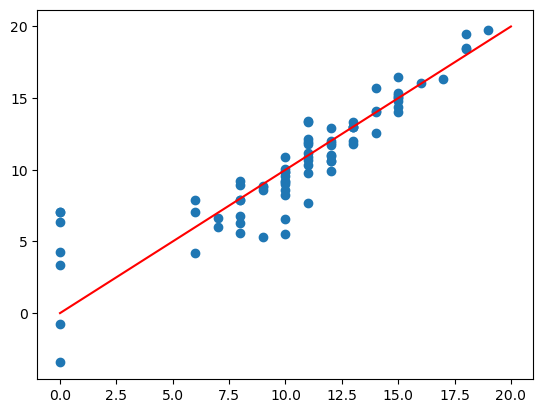

In [79]:
# Predecir peso de observaciones de prueba
yHat = results.predict(sm.add_constant(x_test))
# Importar librería
import matplotlib.pyplot as plt
# Generar gráfica de dispersión
plt.scatter(y_test,yHat)

# Agregar línea roja de referencia
plt.plot([0,20],[0,20],color="red")

Podemos observar que el modelo es bastante acertado, excepto al inicio, con las calificaciones mas bajas. Y que si existe un error entre el dato predicho y el real, aunque no es una diferencia muy significativa.